# Titanic Dataset Analysis using K-nearest neighbor (kNN) classifier

> Overview



## 1. Defining the Question

### a) Specifying the Question

>
* To determine whether a passenger survived or not.



### b) Defining the Metric for Success

This project will be successful when: 

* Succesfful completion of the models and comparing them

### c) Understanding the context 

>

### d) Recording the Experimental Design

Experimental Procedure:

1.   Randomly partition each dataset into two parts i.e 80 - 20  sets.
2.   For dataset 1, because we don't have the label for the test set, we will use the train set to create train and test data (i.e. splitting further), then perform K-nearest neighbor classification.
3. Compute the accuracy (percentage of correct classification).
4. Report the confusion matrix of each classifier.
5. Repeat step 2 to step 4 twice, each time splitting the datasets differently i.e. 70-30, 60-40, then note the outcomes of your modeling.
6. Suggest and apply at least one of the optimization techniques that you learned earlier this week.
7. Provide further recommendations to improve the classifier.
 



### e) Data Relevance

The dataset to use for this project can be found by following these links:
* [Train Dataset Source ](https://archive.org/download/train5_202002/train%20%285%29.csv)
* [Test Dataset Source](https://archive.org/download/test1_202002/test%20%281%29.csv)

Below is the dataset glossary:
* PassengerId
* Survived	
*	Pclass	
*  Name	
*  Sex	
*  Age	
*  SibSp	
* Parch	
* Ticket	
* Fare	
* Cabin	
* Embarked


## 2. Reading the Data

In [ ]:
# Installing packages
!pip install factor_analyzer==0.2.3

In [ ]:
# Loading the libraries
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,KFold,StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
from scipy.stats import bartlett, chi2, loguniform
import os
from scipy import stats
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import FactorAnalyzer
import statsmodels.formula.api as smf
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import bartlett
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
# Using seaborn style defaults and setting the default figure size
sb.set(rc={'figure.figsize':(30, 5)})
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Accessing working directory
os.chdir('/content/drive/My Drive/Machine Learning: Supervised/Week 9 IP')

Mounted at /content/drive


In [ ]:
# Loading the Dataset 
df = pd.read_csv('train.csv')

## 3. Checking the Data

In [ ]:
# Determining the no. of records in our dataset
print(df.shape)

(891, 12)


In [ ]:
# Previewing the top of our dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Previewing the bottom of our dataset
df.tail() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
# Checking whether each column has an appropriate datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 4. External Data Source Validation

> We don't have any other external data set to compare with this data set

## 5. Data Preperation/Tidying the Dataset

### a.Validation

In [ ]:
# Checking for irrelevant columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

> PassengerId, Name and Ticket columns seems irrelevant for our analysis. So, will drop them.

In [ ]:
# Dropping PassengerId, Name and Ticket columns
df = df.drop(columns=['PassengerId', 'Name','Ticket'])

### b. Completeness

In [ ]:
# Checking for missing values
df.isnull().any().any()

True

In [ ]:
# Identifying the Missing Data
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

> We have missing values

In [ ]:
# Checking percentage of missing values per columns
missing_columns = []
for i, col in enumerate(df.columns):
  missing = (df[col].isnull().sum()/df.shape[0])*100
  if missing > 0:
    missing_columns.append(col)
  print(f'{i+1}. {col} = {(df[col].isnull().sum()/df.shape[0])*100}%')

1. Survived = 0.0%
2. Pclass = 0.0%
3. Sex = 0.0%
4. Age = 19.865319865319865%
5. SibSp = 0.0%
6. Parch = 0.0%
7. Fare = 0.0%
8. Cabin = 77.10437710437711%
9. Embarked = 0.22446689113355783%


> Cabin has a very high percentage of missing values. It has to be dropped.

In [ ]:
# The columns with missing values
missing_columns

['Age', 'Cabin', 'Embarked']

In [ ]:
# Dropping Cabin
df.drop('Cabin', axis = 1, inplace = True)

In [ ]:
# Dealing with the missing values in Categorical columns [Embarked]
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# Since S is the majority (mode), we will fill all the NaN values with 'S'
df.Embarked.fillna('S', inplace = True)

In [ ]:
# Converting the numeric columns from object type to numeric datatypes.
# For the numeric columns, will fill the missing values using the column's mean.
columns = ['Age']
for col in columns:
  df[col] = pd.to_numeric(df[col],errors='coerce')
for col in columns:
  df[col].fillna(df[col].mean(), inplace = True)

In [ ]:
# Checking for null values again
df.isnull().any().any()

False

> All null values have been dealt with

### c. Consistency

In [ ]:
# Checking for duplicates
df.duplicated().any().any()

True

In [ ]:
# Dropping duplicates
df.drop_duplicates(inplace = True)
# Checking changes
df.duplicated().any().any()

False

> The duplicate data in our dataset have been dropped. The result dataset has no duplicates.

In [ ]:
# Determining the no. of records in our dataset
print(df.shape)

(780, 8)


### d. Uniformity

In [ ]:
# Checking column names
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

> The columns naming is uniform but will change them to lower case

In [ ]:
# Changing all column names to lower case
df.columns = df.columns.str.lower()
# Checking changes
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

### e. Outliers

In [ ]:
# Creating an outliers function
def outliers(data):
  # IQR
  Q1, Q3, IQR = 0, 0, 0
  outliers = pd.DataFrame()
  # Numerical columns
  numerical = data.select_dtypes(include = ['int64', 'float64'])
  Q1 = numerical.quantile(0.25)
  Q3 = numerical.quantile(0.75)
  IQR = Q3 - Q1
  # Outliers
  outliers = numerical[((numerical < (Q1 - 1.5 * IQR)) |(numerical > (Q3 + 1.5 * IQR))).any(axis=1)]
  print(f'Number of outliers = {outliers.shape[0]}')
  print(f'Percentage = {(outliers.shape[0]/data.shape[0])*100}%')

In [ ]:
# Checking for Outliers
outliers(df)

Number of outliers = 171
Percentage = 21.923076923076923%


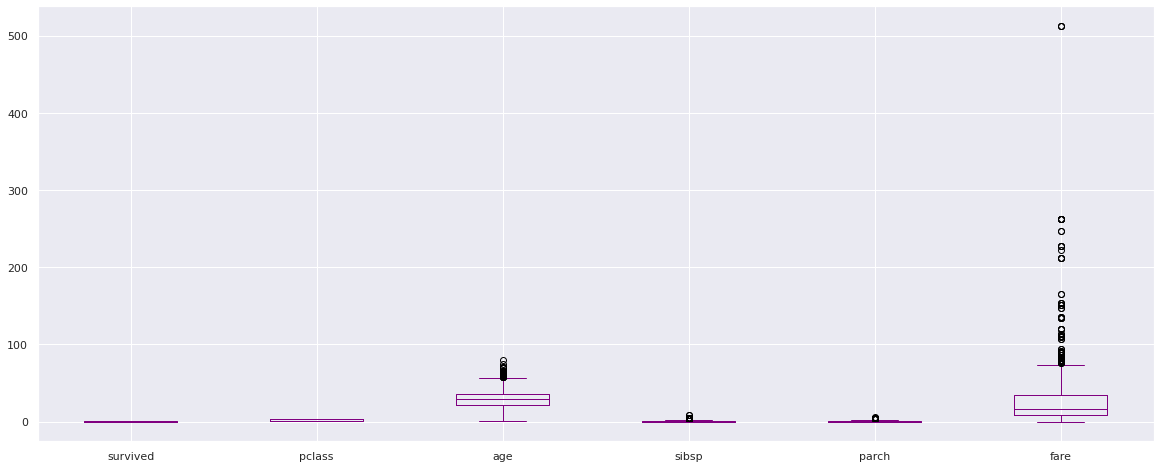

In [ ]:
# Viewing the outliers
df.boxplot(figsize=(20,8),color='purple')

Though we have a great number of outliers in age and fare they form over 21% of our data set hence dropping them will hugely affect our analysis. Thus, will keep them and standadize the data later.

### f. Anomalies

In [ ]:
# Checking for Anomalies
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,780.000000,780.000000,780.000000,780.000000,780.000000,780.000000
mean,0.412821,2.246154,29.797600,0.525641,0.417949,34.829108
std,0.492657,0.854452,13.708883,0.988046,0.838536,52.263440
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.750000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,15.950000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,34.375000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


> The fare column looks abnormal, will have a keen look

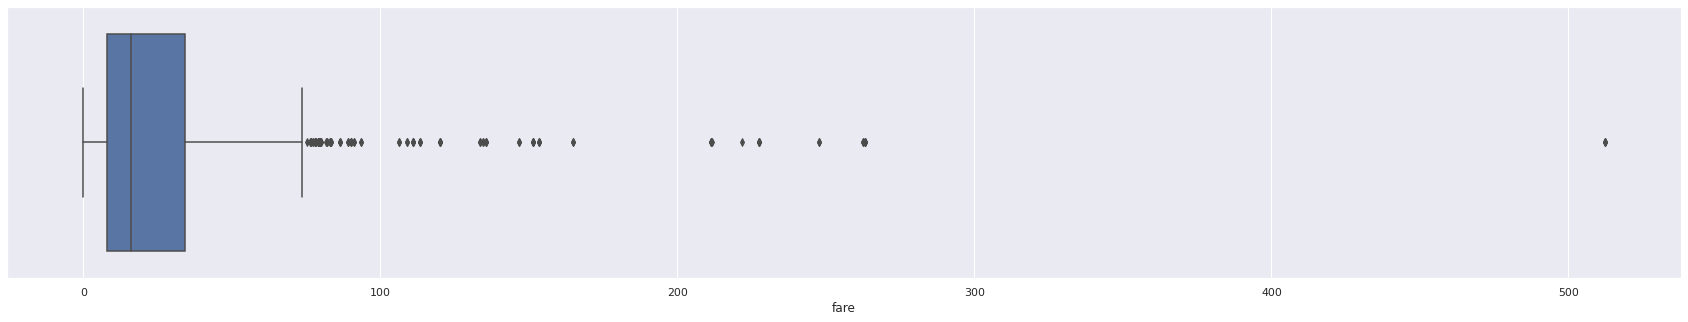

In [ ]:
sb.boxplot(df.fare)

> The values above 200 seems to be anomalies. Will drop them

In [ ]:
df.drop(df[df['fare'] > 200].index, inplace = True)

In [ ]:
# Checking our dataset again
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,0.405263,2.278947,29.765434,0.519737,0.401316,28.395438
std,0.491266,0.841029,13.751279,0.983195,0.825003,30.410085
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.750000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,15.525000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,6.000000,164.866700


> Our data set now looks okay

## 6. Exploratory Descriptive Analysis

#### a) Univariate Analysis

##### Categorical Analysis

> Frequecy tables, Bar Charts, Histograms, Pie charts etc.

In [ ]:
# Number of unique values
cols = df.columns.tolist()
print(f'Number of unique values\n')
for col in cols:
  print(f'{col}: {len(df[col].unique().tolist())}')

Number of unique values

survived: 2
pclass: 3
sex: 2
age: 89
sibsp: 7
parch: 7
fare: 240
embarked: 3


In [ ]:
# columns with specific data type
integer_columns = df.select_dtypes(include=['int64']).columns
float_columns = df.select_dtypes(include=['float64']).columns
object_columns = df.select_dtypes(include=['object']).columns

In [ ]:
# categorical columns
object_columns

Index(['sex', 'embarked'], dtype='object')

In [ ]:
# Categorical Plots
def CatPlots(column, data):
  fig,ax  = plt.subplots(figsize = (10,5))
  sb.countplot(data[column], palette = 'viridis', orient = 'v')
  plt.title('Bar Plot -  '+ column, fontsize=20, y = 1.05)
  plt.xlabel(column, fontsize=15)
  plt.ylabel('Count', fontsize=15)
  plt.show()

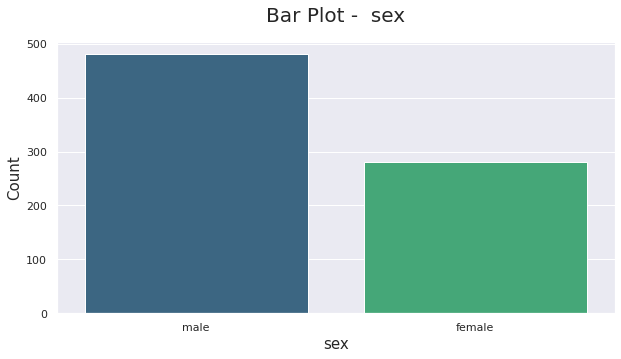

In [ ]:
# Status count plot
CatPlots('sex', df)

> Majority of the passangers were male

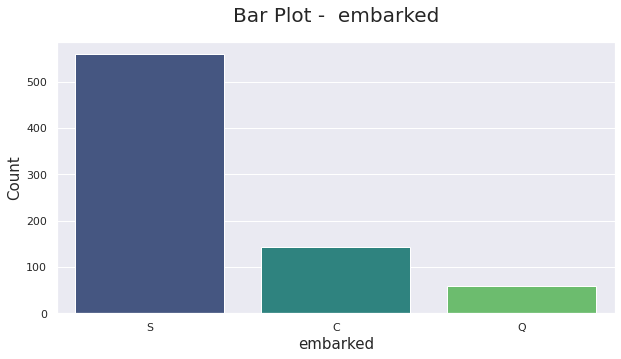

In [ ]:
# Sex count plot
CatPlots('embarked', df)

> Majority of the embarked were S

##### Numerical Analysis

> Measures of Central Tendency and Measures of Dispersion/Variability/Spread, 

In [ ]:
# Describing the Data
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,760.000000,760.000000,760.000000,760.000000,760.000000,760.000000
mean,0.405263,2.278947,29.765434,0.519737,0.401316,28.395438
std,0.491266,0.841029,13.751279,0.983195,0.825003,30.410085
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.750000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,15.525000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,6.000000,164.866700


In [ ]:
# Function that determines the measures of central tendency.
def MeasureCentral(measure, columns, data):
  for column in columns:
    if measure == 'mean':
      print(f"{column} column mean = {data[column].mean()}")
    elif measure == 'median':
      print(f"{column} column median = {data[column].median()}")
    elif measure == 'mode':
      print(f"{column} column mode = {data[column].mode()}")

In [ ]:
# Function used to determine the measures of distribution.
def MeasureDistribution(measure, columns, data):
  for column in columns:
    if measure == 'range':
      print(f"{column} column range = {data[column].max() - data[column].min()}")
    elif measure == 'IQR':
      Q1 = data[column].quantile(0.25)
      Q3 = data[column].quantile(0.75)
      IQR = Q3 - Q1
      print(f"{column} column IQR = {IQR}")
    elif measure == 'var':
      print(f"{column} column variance = {data[column].var()}")
    elif measure == 'std':
      print(f"{column} column std = {data[column].std()}")
    elif measure == 'skew':
      print(f"{column} column skew = {data[column].skew()}")
    elif measure == 'kurt':
      print(f"{column} column kurt = {data[column].kurt()}")

In [ ]:
# Distribution and Boxplot functions
def NumericalPlots(column, data1, data2):
  fig, ax = plt.subplots(2,2, figsize = (12,10))
  # Outliers
  # Distribution plot
  sb.distplot(data1[column], hist=True, ax=ax[0,0], color = 'green')
  ax[0,0].set_title('Outliers: Freq dist '+ column, fontsize=10)
  ax[0,0].set_xlabel(column, fontsize=8)
  ax[0,0].set_ylabel('Count', fontsize=8)
  # Box plot
  sb.boxplot(y = data1[column], ax = ax[0,1], color = 'green')
  ax[0,1].set_title(f'Outliers: Box Plot - {column}')
  ax[0,1].set_xlabel(column)

  # No outliers
  # Distribution plot
  sb.distplot(data2[column], hist=True, ax=ax[1,0], color = 'green')
  ax[1,0].set_title('No outliers: Freq dist '+ column, fontsize=10)
  ax[1,0].set_xlabel(column, fontsize=8)
  ax[1,0].set_ylabel('Count', fontsize=8)
  # Box plot
  sb.boxplot(y = data2[column], ax = ax[1,1], color = 'green')
  ax[1,1].set_title(f'No outliers: Box Plot - {column}')
  ax[1,1].set_xlabel(column)
  plt.show()

In [ ]:
# Numerical columns
numerical = df.select_dtypes(exclude = 'object').columns.tolist()
numerical

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

In [ ]:
# Mean
MeasureCentral('mean', numerical, df)

survived column mean = 0.4052631578947368
pclass column mean = 2.278947368421053
age column mean = 29.765434210526287
sibsp column mean = 0.5197368421052632
parch column mean = 0.40131578947368424
fare column mean = 28.39543815789469


In [ ]:
# Median
MeasureCentral('median', numerical, df)

survived column median = 0.0
pclass column median = 3.0
age column median = 29.69911764705882
sibsp column median = 0.0
parch column median = 0.0
fare column median = 15.525


In [ ]:
# Mode
MeasureCentral('mode', numerical, df)

survived column mode = 0    0
dtype: int64
pclass column mode = 0    3
dtype: int64
age column mode = 0    29.699118
dtype: float64
sibsp column mode = 0    0
dtype: int64
parch column mode = 0    0
dtype: int64
fare column mode = 0    13.0
dtype: float64


In [ ]:
# Range
MeasureDistribution('range', numerical, df)

survived column range = 1
pclass column range = 2
age column range = 79.58
sibsp column range = 8
parch column range = 6
fare column range = 164.8667


In [ ]:
# IQR
MeasureDistribution('IQR', numerical, df)

survived column IQR = 1.0
pclass column IQR = 2.0
age column IQR = 14.25
sibsp column IQR = 1.0
parch column IQR = 1.0
fare column IQR = 23.224999999999998


In [ ]:
# Variance
MeasureDistribution('var', numerical, df)

survived column variance = 0.24134248665141372
pclass column variance = 0.7073295887941147
age column variance = 189.09766803178164
sibsp column variance = 0.9666718674155682
parch column variance = 0.6806306774842169
fare column variance = 924.7732465918199


In [ ]:
# Standard Deviation
MeasureDistribution('std', numerical, df)

survived column std = 0.4912662075203359
pclass column std = 0.8410288870152527
age column std = 13.751278778054848
sibsp column std = 0.983194725075134
parch column std = 0.8250034408923498
fare column std = 30.410084619938495


In [ ]:
# Skew
MeasureDistribution('skew', numerical, df)

survived column skew = 0.386701979227551
pclass column skew = -0.5635116494072608
age column skew = 0.38869196175566173
sibsp column skew = 3.1221371185041926
parch column skew = 2.7240444110932787
fare column skew = 2.1399271500655423


In [ ]:
# Kurtosis
MeasureDistribution('kurt', numerical, df)

survived column kurt = -1.8553510332650385
pclass column kurt = -1.355878693743653
age column kurt = 0.5675679645662912
sibsp column kurt = 13.331712013644555
parch column kurt = 9.685220482261709
fare column kurt = 4.66364052173145


#### b) Bivariate Analysis

##### Numerical and Numerical

> Scatter plots, correlations etc

<Figure size 1440x576 with 0 Axes>

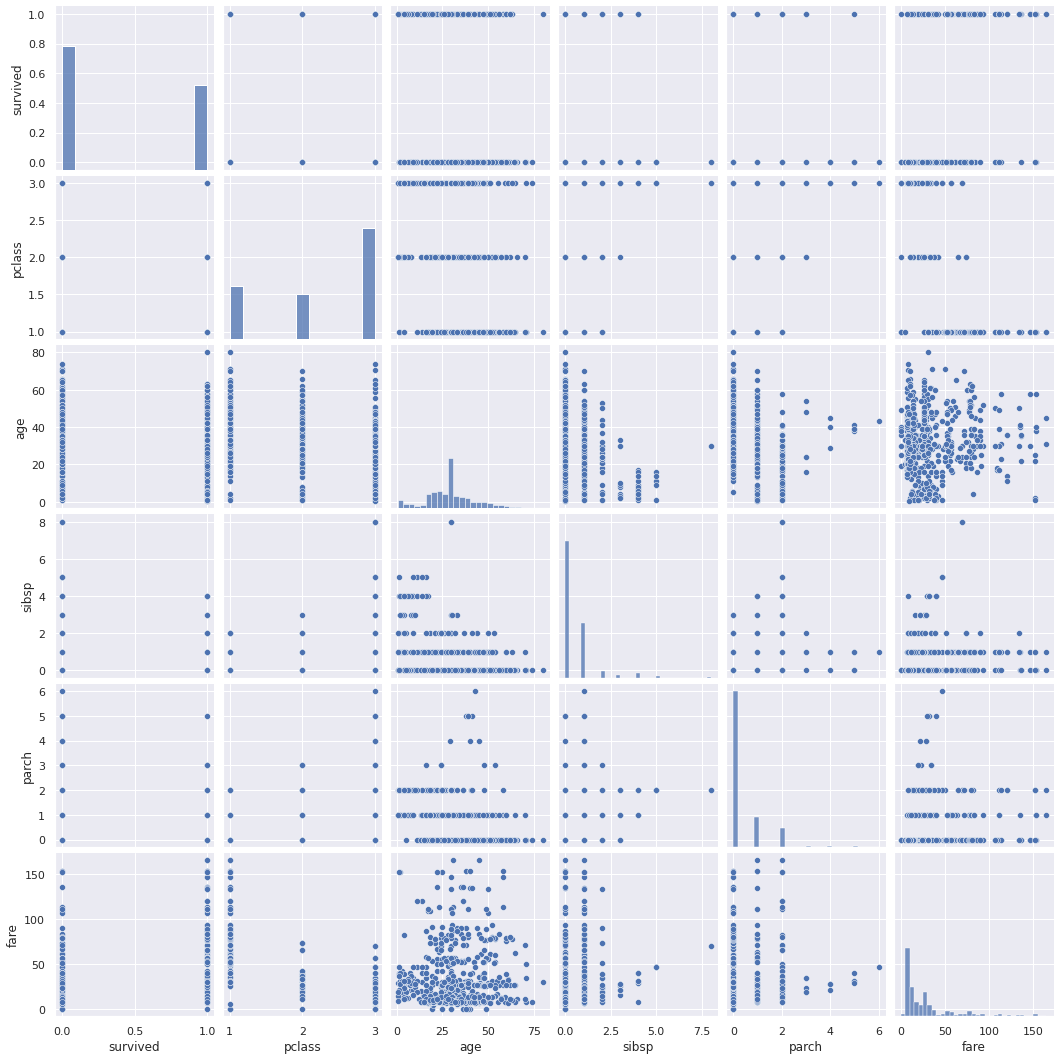

In [ ]:
# Explore the types of relationships across the entire data set.
plt.figure(figsize=(20,8))
sb.pairplot(df)

> From the pairplots, it's hard to see any forms of correlations yet


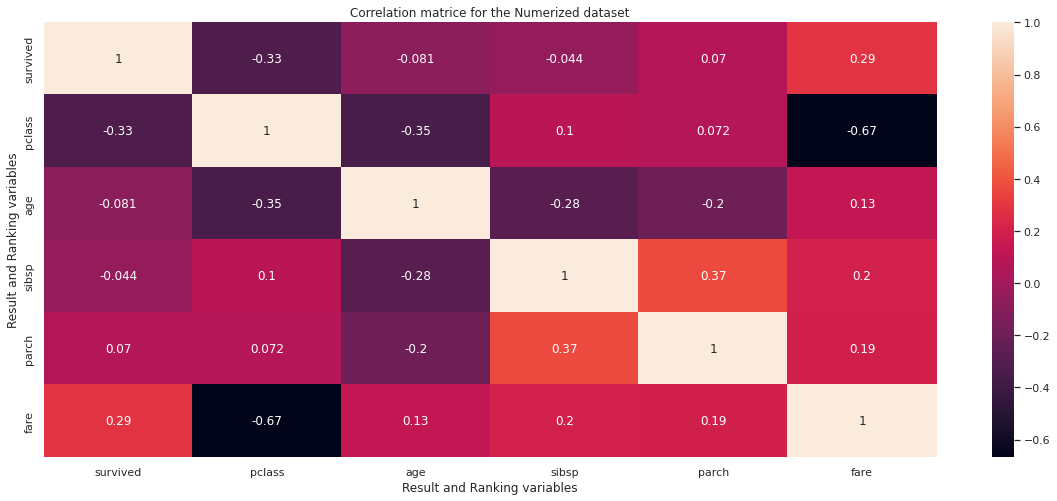

In [ ]:
# Heatmap of correlation
plt.figure(figsize=(20,8))
corr_matrix = df.corr(method = 'pearson')

sb.heatmap(corr_matrix, annot = True)

plt.title("Correlation matrice for the Numerized dataset")

plt.xlabel("Result and Ranking variables")

plt.ylabel("Result and Ranking variables")

plt.show()

We see a strong correlation (c>0.5) betweenm:
* pclass and fare

We see a weak correlation (0.2<c<0.5) between:
* survived and fare
* survived and pclass
* age and pclass
* age and sibsp

There is hardly a correlation between the remaining pairs ( c<0.2)

In [ ]:
# defining a function to plot regression relation between two variables

def cor(col1,col2,d):
  ans = sb.regplot(x = col1, y = col2, data = d, scatter_kws = {"color": "red"}, line_kws = {"color": "black"})
  return ans

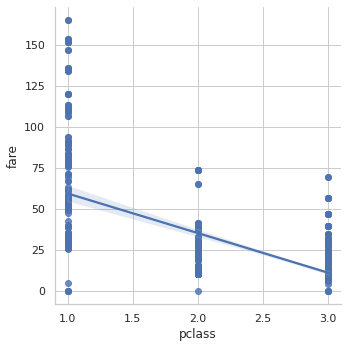

In [ ]:
# pclass and fare
sb.set_style('whitegrid')
sb.lmplot(x='pclass',y='fare',data=df)

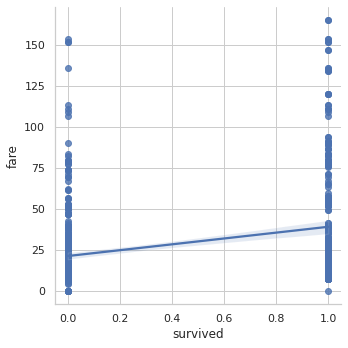

In [ ]:
# survived and fare
sb.set_style('whitegrid')
sb.lmplot(x='survived',y='fare',data=df)

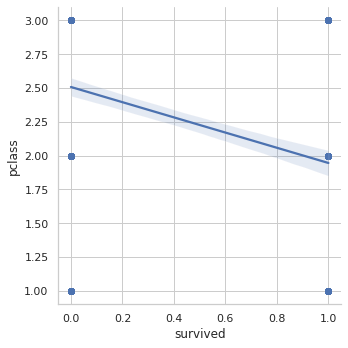

In [ ]:
# survived and pclass
sb.set_style('whitegrid')
sb.lmplot(x='survived',y='pclass',data=df)

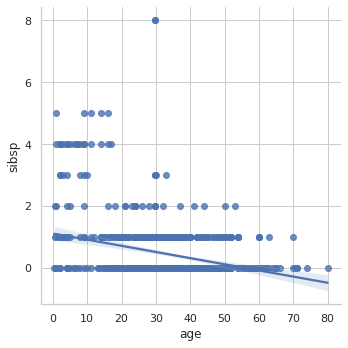

In [ ]:
# age and sibsp
sb.set_style('whitegrid')
sb.lmplot(x='age',y='sibsp',data=df)

##### Categorical and Categorical

> Stacked column charts etc

##### Categorical and Numerical

> Z-test, T-test, Line charts etc

#### c) Multivariet Analysis

> Feature reduction (LDA, PCA, FA etc), Feature selection, Feature Engineering, One-Hot Encoding, Label Encoding, Multicollinearity check etc.

##### Multicollinearity Check

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features. For each regression, the factor is calculated as :

VIF=\frac{1}{1-R^2}

Where, R-squared is the coefficient of determination in linear regression. Its value lies between 0 and 1.

As we see from the formula, greater the value of R-squared, greater is the VIF. Hence, greater VIF denotes greater correlation. This is in agreement with the fact that a higher R-squared value denotes a stronger collinearity. Generally, a VIF above 5 indicates a high multicollinearity. 

In [ ]:
# calculating VIF for each feature
# VIF function
def VIF(data):
  # Correlation matrix
  correlation = data.corr()
  # Inverse matrix
  inv_corr = pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)
  return inv_corr

In [ ]:
VIF(df)

,survived,pclass,age,sibsp,parch,fare
survived,1.202138,0.394111,0.275851,0.148376,-0.086276,-0.131555
pclass,0.394111,2.370365,0.531174,-0.270005,-0.283488,1.510136
age,0.275851,0.531174,1.299245,0.278766,0.093128,0.033941
sibsp,0.148376,-0.270005,0.278766,1.329212,-0.339279,-0.459976
parch,-0.086276,-0.283488,0.093128,-0.339279,1.238321,-0.347984
fare,-0.131555,1.510136,0.033941,-0.459976,-0.347984,2.201649


> We don't have any VIF above 5 hence our dataset has no multicollinearity

##### Label Encoding

In [ ]:
# Understanding the columns
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# # Label encode Status column
# df[['xxx']] = df[['xxx']].apply(LabelEncoder().fit_transform)
# # Checking changes
# df.head()

> Will not label encode any column

##### One-Hot Encoding

In [ ]:
# One-hot encoding categorical columns
df = pd.get_dummies(df)
# Checking changes
df.head()

,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


##### Linear Discriminant Analysis

In [ ]:
# LDA function
def Lda(X_train, X_test, y_train, components = None):
  lda = LDA(n_components= components)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)
  return X_train, X_test

##### Standardization

In [ ]:
# Standardization function
def Standardization(X_train, X_test):
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  return X_train, X_test

## 7. Modelling

### Model 1: 80-20

#### Without Optimization

In [ ]:
# Features and label
X = df.drop('survived', axis = 1)
y = df.survived
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Training our data set
# There is no ideal value for K and it is selected after testing and evaluation, 
# however, 5 seems to be the most commonly used value for KNN algorithm.
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = classifier.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()

,Actual,Predicted
count,152.000000,152.000000
mean,0.427632,0.263158
std,0.496371,0.441803
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [ ]:
comparison_frame.head(10)

,Actual,Predicted
875,1,0
676,0,0
667,0,0
41,0,0
263,0,0
440,1,0
487,0,0
132,0,0
32,1,1
308,0,1


In [ ]:
# Classification report
report = classification_report(y_test, y_pred)
print(f'Classification Report')
print(f'{"-"*70}\n')
print(f'{report}')

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.65      0.84      0.73        87
           1       0.65      0.40      0.50        65

    accuracy                           0.65       152
   macro avg       0.65      0.62      0.61       152
weighted avg       0.65      0.65      0.63       152



In [ ]:
# Evaluating the model using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[73 14]
 [39 26]]
Accuracy 0.6513157894736842


> We have a 65.13% accuracy.

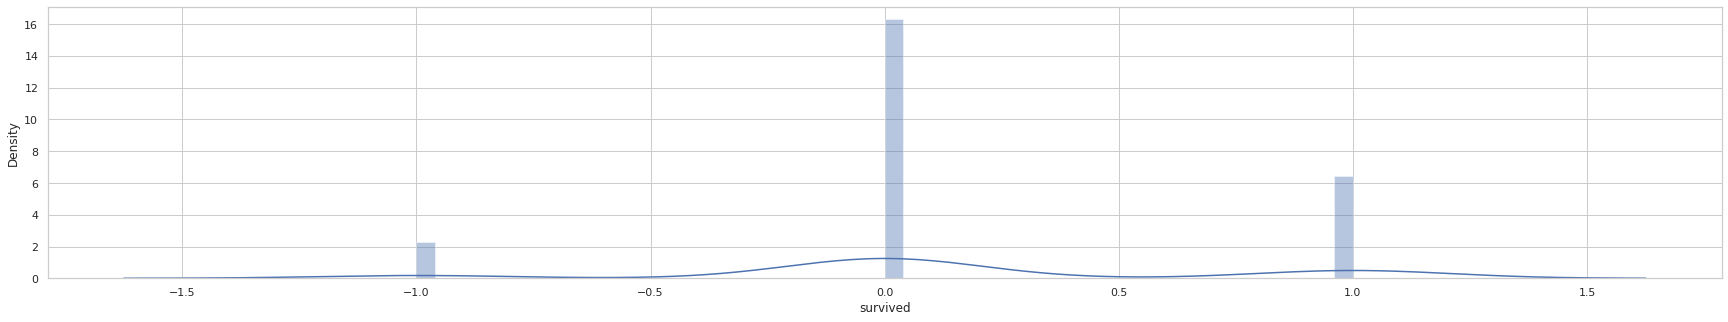

In [ ]:
# Residual Plot
sb.distplot((y_test-y_pred),bins=50);

Heteroscedasticity
> Bartlett’s test is used to check whether all samples have the same variance. It’s also called Bartlett’s test for homogeneity.We will consider the level of significance of alpha value to be 0.05

In [ ]:
  # Bartlett's test
  residuals = y_pred - y_test
  test_statistic, p_value = bartlett(y_pred, residuals)
  print(f'\nP_Vlaue = {p_value}')
  print(f'test_statistic = {test_statistic}')

  # Degrees of freedom
  dff = len(y_pred - 1)
  probability = 1 - p_value
  # Critical value
  critical_value = chi2.ppf(probability, dff)
  print(f'Critical Value: {critical_value}')
  if (p_value < 0.05) and (test_statistic > critical_value ):
    print('Variances are unequal')
  else:
    print('Variances are equal')


P_Vlaue = 0.002017216028538223
test_statistic = 9.533803813587102
Critical Value: 206.99650865802332
Variances are equal


> Our data is homogenious

#### With Optimization

In [ ]:
# Features and label
X = df.drop('survived', axis = 1)
y = df.survived
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Optimization
# Standardization
X_train, X_test = Standardization(X_train, X_test)

#LDA 
X_train, X_test = Lda(X_train, X_test, y_train, components = None)


In [ ]:
# Training our data set
# There is no ideal value for K and it is selected after testing and evaluation, 
# however, 5 seems to be the most commonly used value for KNN algorithm.
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = classifier.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()

,Actual,Predicted
count,152.000000,152.000000
mean,0.427632,0.394737
std,0.496371,0.490410
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [ ]:
comparison_frame.head(10)

,Actual,Predicted
875,1,1
676,0,0
667,0,0
41,0,1
263,0,1
440,1,1
487,0,0
132,0,1
32,1,1
308,0,0


In [ ]:
# Classification report
report = classification_report(y_test, y_pred)
print(f'Classification Report')
print(f'{"-"*70}\n')
print(f'{report}')

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.78      0.83      0.80        87
           1       0.75      0.69      0.72        65

    accuracy                           0.77       152
   macro avg       0.77      0.76      0.76       152
weighted avg       0.77      0.77      0.77       152



In [ ]:
# Evaluating the model using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[72 15]
 [20 45]]
Accuracy 0.7697368421052632


> We have an accuracy of 76.97%

Residual Plots

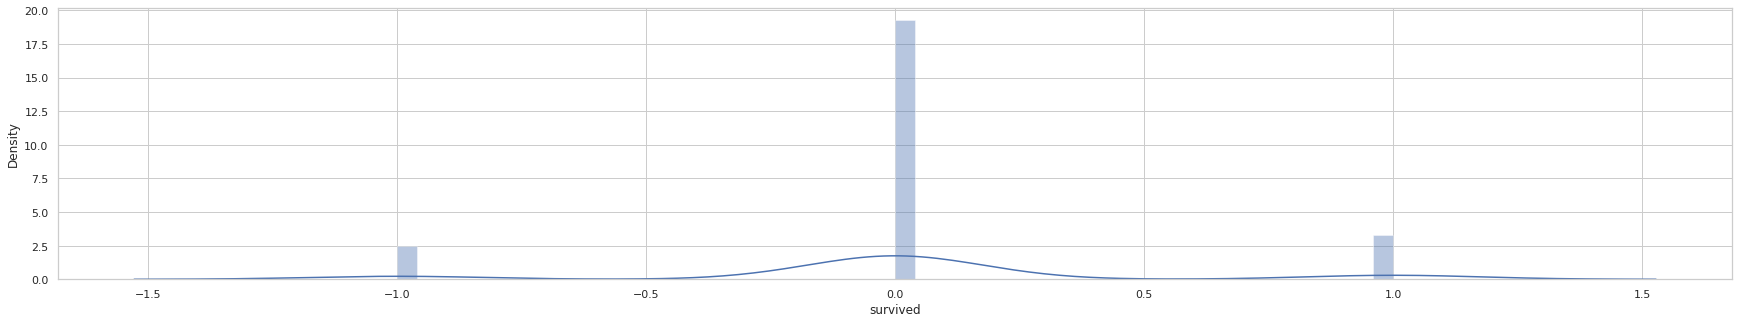

In [ ]:
# Residual Plot
sb.distplot((y_test-y_pred),bins=50);

Heteroscedasticity

In [ ]:
  # Bartlett's test
  residuals = y_pred - y_test
  test_statistic, p_value = bartlett(y_pred, residuals)
  print(f'\nP_Vlaue = {p_value}')
  print(f'test_statistic = {test_statistic}')

  # Degrees of freedom
  dff = len(y_pred - 1)
  probability = 1 - p_value
  # Critical value
  critical_value = chi2.ppf(probability, dff)
  print(f'Critical Value: {critical_value}')
  if (p_value < 0.05) and (test_statistic > critical_value ):
    print('Variances are unequal')
  else:
    print('Variances are equal')


P_Vlaue = 0.7985264400792267
test_statistic = 0.06515492572758953
Critical Value: 137.2509882997036
Variances are equal


#### Conclusion

* The optimized model (76.97%) has a higher accuracy compared to the non-optimized model (65.13%)



### Model 2: 70-30

#### Without Optimization

In [ ]:
# Features and label
X = df.drop('survived', axis = 1)
y = df.survived
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# Training our data set
# There is no ideal value for K and it is selected after testing and evaluation, 
# however, 5 seems to be the most commonly used value for KNN algorithm.
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = classifier.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()

,Actual,Predicted
count,228.000000,228.000000
mean,0.438596,0.333333
std,0.497307,0.472442
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [ ]:
comparison_frame.head(10)

,Actual,Predicted
875,1,0
676,0,0
667,0,0
41,0,1
263,0,0
440,1,0
487,0,0
132,0,0
32,1,1
308,0,0


In [ ]:
# Classification report
report = classification_report(y_test, y_pred)
print(f'Classification Report')
print(f'{"-"*70}\n')
print(f'{report}')

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.66      0.79      0.72       128
           1       0.64      0.49      0.56       100

    accuracy                           0.66       228
   macro avg       0.65      0.64      0.64       228
weighted avg       0.66      0.66      0.65       228



In [ ]:
# Evaluating the model using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[101  27]
 [ 51  49]]
Accuracy 0.6578947368421053


> We have a 65.79% accuracy.

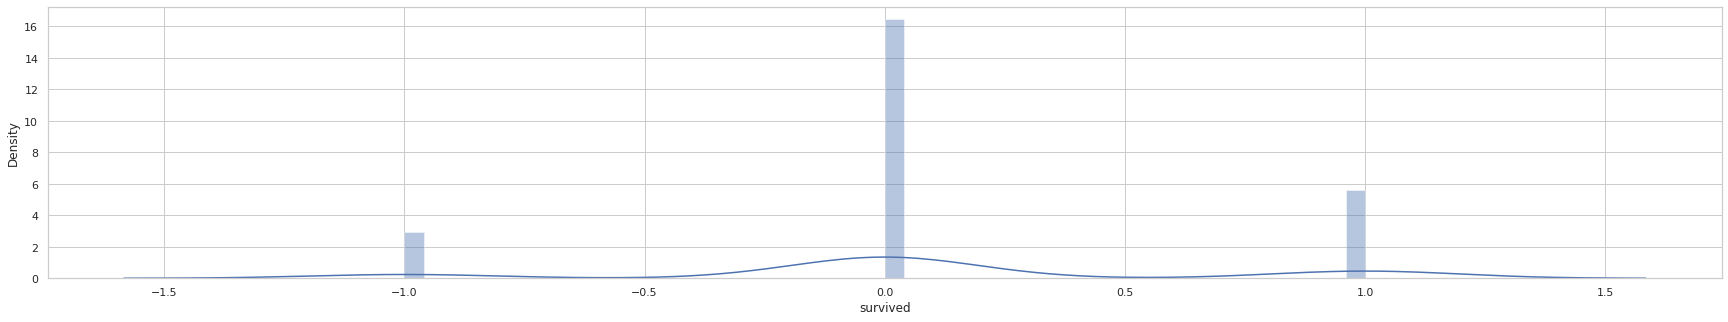

In [ ]:
# Residual Plot
sb.distplot((y_test-y_pred),bins=50);

Heteroscedasticity
> Bartlett’s test is used to check whether all samples have the same variance. It’s also called Bartlett’s test for homogeneity.We will consider the level of significance of alpha value to be 0.05

In [ ]:
  # Bartlett's test
  residuals = y_pred - y_test
  test_statistic, p_value = bartlett(y_pred, residuals)
  print(f'\nP_Vlaue = {p_value}')
  print(f'test_statistic = {test_statistic}')

  # Degrees of freedom
  df1 = len(y_pred - 1)
  probability = 1 - p_value
  # Critical value
  critical_value = chi2.ppf(probability, df1)
  print(f'Critical Value: {critical_value}')
  if (p_value < 0.05) and (test_statistic > critical_value ):
    print('Variances are unequal')
  else:
    print('Variances are equal')


P_Vlaue = 0.0027990327286785627
test_statistic = 8.934048296191689
Critical Value: 291.6159493543125
Variances are equal


> Our data is homogenious

#### With Optimization

In [ ]:
# Features and label
X = df.drop('survived', axis = 1)
y = df.survived
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# Optimization
# Standardization
X_train, X_test = Standardization(X_train, X_test)

#LDA 
X_train, X_test = Lda(X_train, X_test, y_train, components = None)


In [ ]:
# Training our data set
# There is no ideal value for K and it is selected after testing and evaluation, 
# however, 5 seems to be the most commonly used value for KNN algorithm.
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = classifier.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()

,Actual,Predicted
count,228.000000,228.000000
mean,0.438596,0.350877
std,0.497307,0.478295
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [ ]:
comparison_frame.head(10)

,Actual,Predicted
875,1,1
676,0,0
667,0,0
41,0,1
263,0,0
440,1,1
487,0,0
132,0,0
32,1,1
308,0,0


In [ ]:
# Classification report
report = classification_report(y_test, y_pred)
print(f'Classification Report')
print(f'{"-"*70}\n')
print(f'{report}')

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       128
           1       0.76      0.61      0.68       100

    accuracy                           0.75       228
   macro avg       0.75      0.73      0.73       228
weighted avg       0.75      0.75      0.74       228



In [ ]:
# Evaluating the model using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[109  19]
 [ 39  61]]
Accuracy 0.7456140350877193


> We have an accuracy of 74.56%

Residual Plots

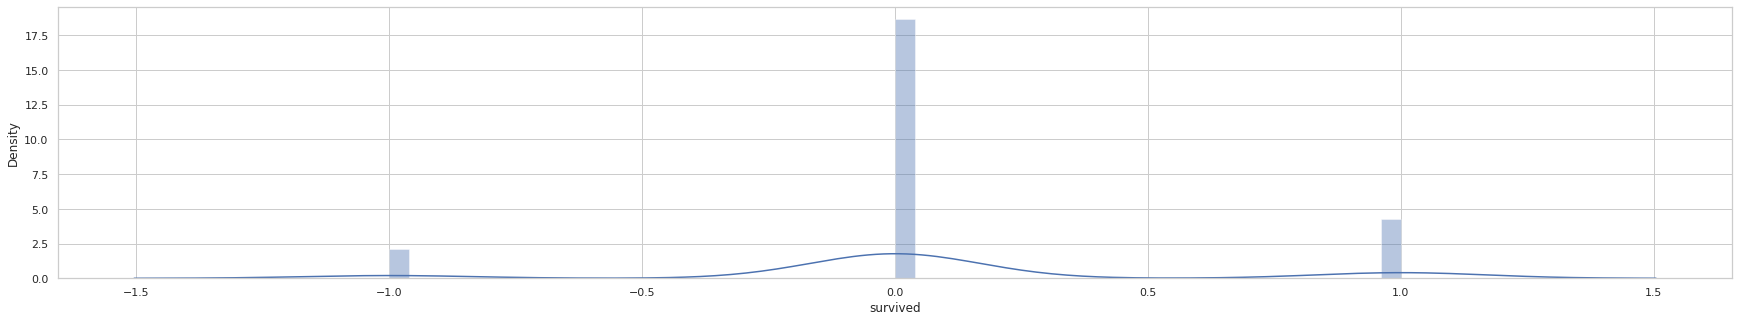

In [ ]:
# Residual Plot
sb.distplot((y_test-y_pred),bins=50);

Heteroscedasticity

In [ ]:
  # Bartlett's test
  residuals = y_pred - y_test
  test_statistic, p_value = bartlett(y_pred, residuals)
  print(f'\nP_Vlaue = {p_value}')
  print(f'test_statistic = {test_statistic}')

  # Degrees of freedom
  df2 = len(y_pred - 1)
  probability = 1 - p_value
  # Critical value
  critical_value = chi2.ppf(probability, df2)
  print(f'Critical Value: {critical_value}')
  if (p_value < 0.05) and (test_statistic > critical_value ):
    print('Variances are unequal')
  else:
    print('Variances are equal')


P_Vlaue = 0.5480563642278331
test_statistic = 0.3608106525060491
Critical Value: 224.769228187377
Variances are equal


#### Conclusion

* The optimized model (74.56%) has a higher accuracy compared to the non-optimized model (65.79%)

### Model 3: 60-40

#### Without Optimization

In [ ]:
# Features and label
X = df.drop('survived', axis = 1)
y = df.survived
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [ ]:
# Training our data set
# There is no ideal value for K and it is selected after testing and evaluation, 
# however, 5 seems to be the most commonly used value for KNN algorithm.
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = classifier.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()

,Actual,Predicted
count,304.000000,304.000000
mean,0.437500,0.302632
std,0.496896,0.460155
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [ ]:
comparison_frame.head(10)

,Actual,Predicted
875,1,0
676,0,0
667,0,0
41,0,1
263,0,0
440,1,0
487,0,0
132,0,0
32,1,0
308,0,0


In [ ]:
# Classification report
report = classification_report(y_test, y_pred)
print(f'Classification Report')
print(f'{"-"*70}\n')
print(f'{report}')

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.66      0.82      0.73       171
           1       0.66      0.46      0.54       133

    accuracy                           0.66       304
   macro avg       0.66      0.64      0.64       304
weighted avg       0.66      0.66      0.65       304



In [ ]:
# Evaluating the model using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[140  31]
 [ 72  61]]
Accuracy 0.6611842105263158


> We have a 66.11% accuracy.


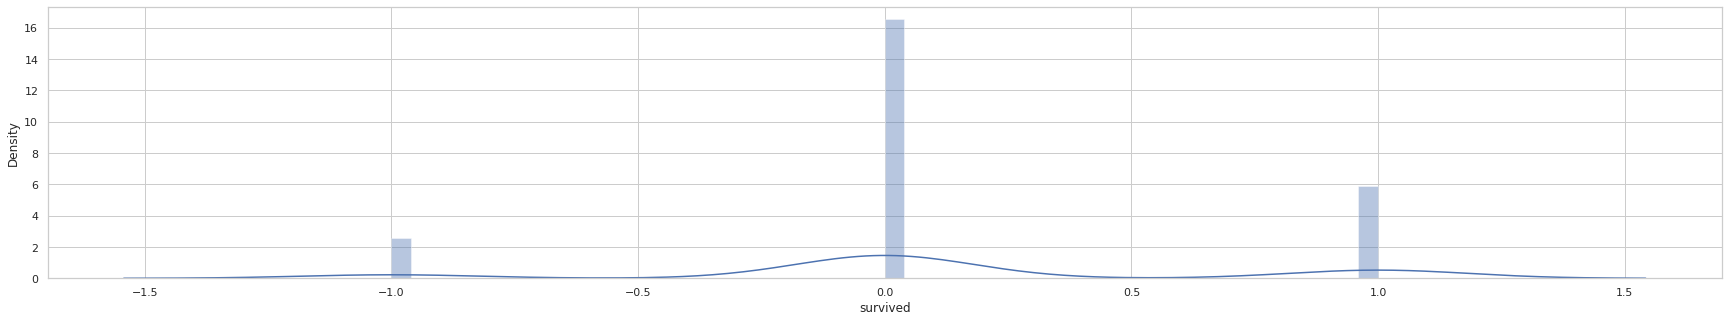

In [ ]:
# Residual Plot
sb.distplot((y_test-y_pred),bins=50);

Heteroscedasticity
> Bartlett’s test is used to check whether all samples have the same variance. It’s also called Bartlett’s test for homogeneity.We will consider the level of significance of alpha value to be 0.05

In [ ]:
  # Bartlett's test
  residuals = y_pred - y_test
  test_statistic, p_value = bartlett(y_pred, residuals)
  print(f'\nP_Vlaue = {p_value}')
  print(f'test_statistic = {test_statistic}')

  # Degrees of freedom
  df3 = len(y_pred - 1)
  probability = 1 - p_value
  # Critical value
  critical_value = chi2.ppf(probability, df3)
  print(f'Critical Value: {critical_value}')
  if (p_value < 0.05) and (test_statistic > critical_value ):
    print('Variances are unequal')
  else:
    print('Variances are equal')


P_Vlaue = 0.0002904481632898927
test_statistic = 13.131009957027633
Critical Value: 396.1232879222135
Variances are equal


> Our data is homogenious

#### With Optimization

In [ ]:
# Features and label
X = df.drop('survived', axis = 1)
y = df.survived
# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [ ]:
# Optimization
# Standardization
X_train, X_test = Standardization(X_train, X_test)

#LDA 
X_train, X_test = Lda(X_train, X_test, y_train, components = None)


In [ ]:
# Training our data set
# There is no ideal value for K and it is selected after testing and evaluation, 
# however, 5 seems to be the most commonly used value for KNN algorithm.
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = classifier.predict(X_test)
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_frame.describe()

,Actual,Predicted
count,304.000000,304.000000
mean,0.437500,0.355263
std,0.496896,0.479382
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [ ]:
comparison_frame.head(10)

,Actual,Predicted
875,1,1
676,0,0
667,0,0
41,0,1
263,0,0
440,1,1
487,0,0
132,0,0
32,1,0
308,0,0


In [ ]:
# Classification report
report = classification_report(y_test, y_pred)
print(f'Classification Report')
print(f'{"-"*70}\n')
print(f'{report}')

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.73      0.84      0.78       171
           1       0.75      0.61      0.67       133

    accuracy                           0.74       304
   macro avg       0.74      0.73      0.73       304
weighted avg       0.74      0.74      0.74       304



In [ ]:
# Evaluating the model using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

[[144  27]
 [ 52  81]]
Accuracy 0.7401315789473685


> We have an accuracy of 74.01%

Residual Plots

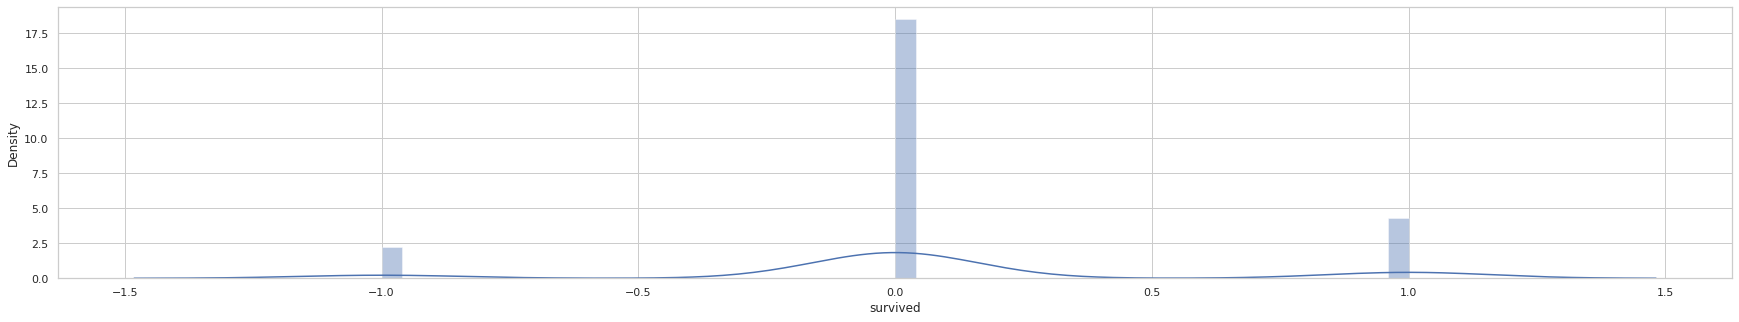

In [ ]:
# Residual Plot
sb.distplot((y_test-y_pred),bins=50);

Heteroscedasticity

In [ ]:
  # Bartlett's test
  residuals = y_pred - y_test
  test_statistic, p_value = bartlett(y_pred, residuals)
  print(f'\nP_Vlaue = {p_value}')
  print(f'test_statistic = {test_statistic}')

  # Degrees of freedom
  df4 = len(y_pred - 1)
  probability = 1 - p_value
  # Critical value
  critical_value = chi2.ppf(probability, df4)
  print(f'Critical Value: {critical_value}')
  if (p_value < 0.05) and (test_statistic > critical_value ):
    print('Variances are unequal')
  else:
    print('Variances are equal')


P_Vlaue = 0.3852651190267643
test_statistic = 0.7538338504647331
Critical Value: 310.573389932697
Variances are equal


#### Conclusion

* The optimized model (74.01%) has a higher accuracy compared to the non-optimized model (66.11%)

## 8. Implementing the Solution

From the analysis, this is the comparison between the models:


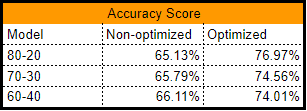

* The best model is the Optimized 80-20 Model

## 9. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






## 10. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

> Yes.

### b). Do we need other data to answer our question?

> No

### c). Did we have the right question?

> Yes